### 선형회귀와 진단 - Sklearn 라이브러리 사용

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pylab
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
%matplotlib inline

#### 1. Scikit-Learn의 California Housing 데이터셋을 읽어온다.

In [40]:
data = fetch_california_housing()

In [41]:
# 딕셔너리의 키 출력.
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [42]:
# 데이터에 대한 설명문 출력.
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [43]:
# 설명변수.
X = data['data']
header = data['feature_names']

In [44]:
# 반응변수.
Y = data['target']
Y = Y.reshape(-1, 1)

#### 2. 데이터셋을 DataFrame로 변환하여 탐색한다.

In [45]:
df = pd.DataFrame(np.append(X,Y,axis = 1))
df.columns = list(header)+['PRICE']

In [46]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [47]:
df.tail(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [48]:
# 기술통계 요약.
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [49]:
# 상관계수 행령.
np.round(df.corr(),2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
PRICE,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


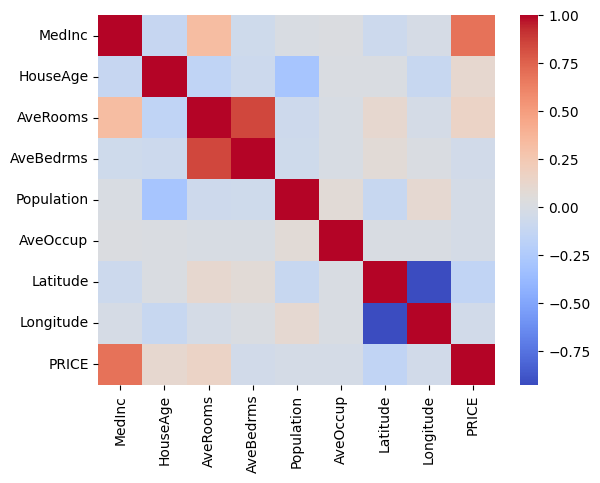

In [50]:
# 상관계수 행렬을 Heatmap으로 시각화.
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

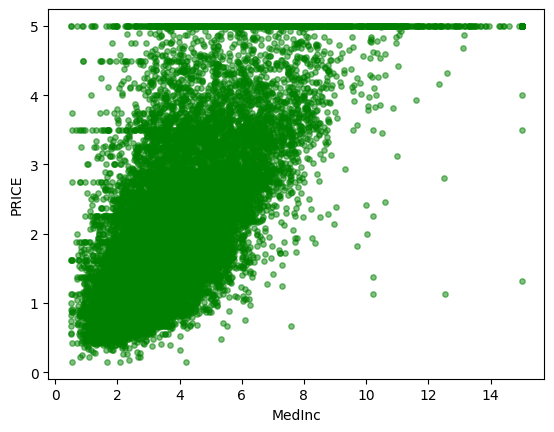

In [51]:
# MedInc vs PRICE 산점도.
#plt.scatter(X[:,0],Y[:,0],c = 'g',s=15,alpha=0.5)
plt.scatter(df.MedInc, df.PRICE, c='g', s=15, alpha=0.5)
plt.xlabel('MedInc')
plt.ylabel('PRICE')
plt.show()

#### 3. 선형회귀 학습.

In [52]:
# 학습진행.
my_model = LinearRegression(fit_intercept=True)
my_model.fit(X,Y)

LinearRegression()

In [53]:
# 절편 출력.
my_model.intercept_

array([-36.94192021])

In [54]:
# 회귀계수 출력.
my_model.coef_

array([[ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,
         6.45065694e-01, -3.97638942e-06, -3.78654265e-03,
        -4.21314378e-01, -4.34513755e-01]])

In [55]:
# 모형의 파라미터를 DataFrame의 형태로 출력.
parametersDF = pd.DataFrame(my_model.coef_,index=['Parameter Value'],columns=header)
parametersDF['Intercept'] = my_model.intercept_[0]
parametersDF

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Intercept
Parameter Value,0.436693,0.009436,-0.107322,0.645066,-0.000004,-0.003787,-0.421314,-0.434514,-36.94192


#### 4. 성능 진단.

In [56]:
# In-sample 예측.
predY = my_model.predict(X)

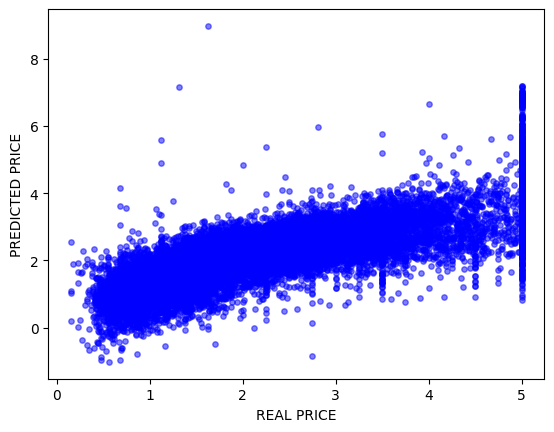

In [57]:
# 실제 Y vs 예측 Y 시각화 출력.
plt.scatter(Y, predY,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

In [58]:
# 실제 Y vs 예측 Y 상관계수.
pd.Series(Y[:,0]).corr(pd.Series(predY[:,0]))

0.7786094561458937

In [59]:
# 결정계수 (R^2):
my_model.score(X,Y)

0.606232685199805

#### 5. In-sample & out-of-sample 테스팅.

In [60]:
# 데이터셋을 쪼갠다.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1122)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12384, 8)
(8256, 8)
(12384, 1)
(8256, 1)


In [61]:
# predY_in = in-sample 예측 Y.
# predY_out = out-of-sample 예측 Y.
my_model = LinearRegression()
my_model.fit(X_train,Y_train)
predY_in = my_model.predict(X_train)
predY_out = my_model.predict(X_test)

In [62]:
print('In-sample MSE is      : ' + str(metrics.mean_squared_error(Y_train, predY_in)))
print('Out-of-sample MSE is  : ' + str(metrics.mean_squared_error(Y_test, predY_out)))
print('-'*50)
print('In-sample RMSE is     : ' + str(np.sqrt(metrics.mean_squared_error(Y_train, predY_in))))
print('Out-of-sample RMSE is : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, predY_out))))

In-sample MSE is      : 0.5076947956119255
Out-of-sample MSE is  : 0.557648902222146
--------------------------------------------------
In-sample RMSE is     : 0.7125270490387895
Out-of-sample RMSE is : 0.7467589317993766


NOTE: In-sample 오류가 다소 작아 보인다.

#### 6. 잔차 분석.

In [63]:
# 전차 계산.
residual = Y_train - predY_in

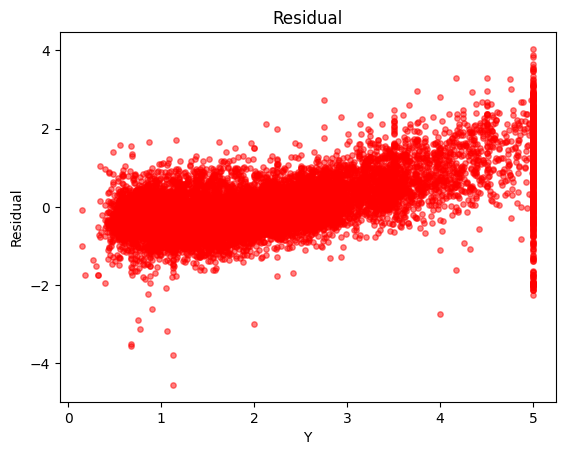

In [64]:
# Q: 시각적으로 잔차가 0을 평균으로 고르게 분포해 있는 것을 확인할 수 있는가?
plt.scatter(Y_train, residual,c = 'red', s=15, alpha=0.5)
plt.xlabel('Y')
plt.ylabel('Residual')
plt.title('Residual')
plt.show()

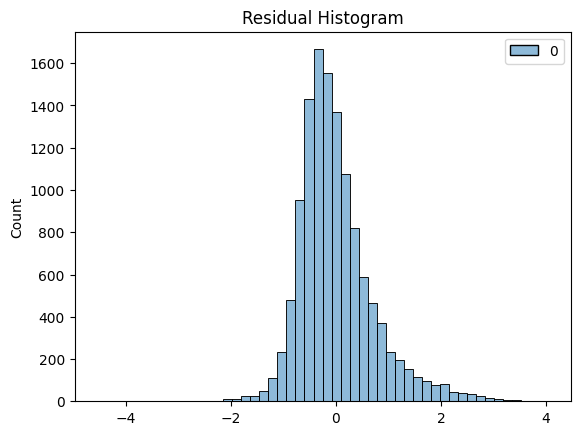

In [65]:
# Q: 잔차가 0을 중심으로 정규분포를 따르며 분포해 있는가? (정상성)
g = sns.histplot(residual, bins=50, color='green')
g.set_title("Residual Histogram")
plt.show()

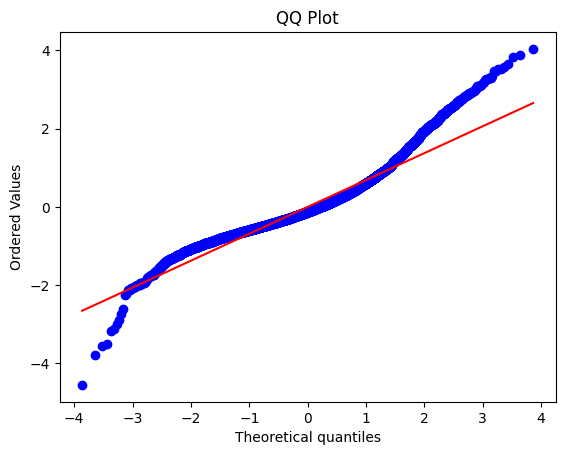

In [66]:
# QQ Plot을 사용해서 잔차의 정상성을 확인해 본다.
# 잔차의 분위수 vs 이론 분위수.
residual = residual.reshape(-1,)
st.probplot(residual, dist = 'norm', plot = pylab)
plt.title('QQ Plot')
plt.show()

#### 7. 다음과 같이 설명변수의 값이 새롭게 주어졌을 때 반응 변수의 값을 예측해 본다.
- MedInc: 3.87
- HouseAge: 28.6
-	AveRooms: 5.42
-	AveBedrms: 1.0
-	Population: 1425.0
-	AveOccup: 3.0
-	Latitude: 35.63
-	Longitude: -119.57

In [67]:
X_new = np.array([3.87, 28.6, 5.42, 1.0, 1425.0, 3.0, 35.63, -119.57]).reshape(1,-1)  # 한개의 행으로 reshape.
Y_pred_new = my_model.predict(X_new)
print(np.round(Y_pred_new[0,0],3))

1.994
